<a href="https://colab.research.google.com/github/tmarissa/marissa_DATA606/blob/main/ipynb/301_Merged_Density_and_Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 606 Capstone
## Marissa Tan
### Impact of COVID-19 on the US Housing Market
__Density and Real Estate__<br><br>
This notebook:
- Merge the density and real estate dataset.
- Remove Null values 
- Show MSNO matrix

In [1]:
import pandas as pd
import matplotlib
import missingno as msno

%matplotlib inline

# 1. Density and Real Estate 

## 1.1 Read CSV Files
Load Density and Real Estate files

In [2]:
density_df = pd.read_csv('Density.csv', index_col=False)
density_df.head()

,FIPS,county,state,2016,2017,2018,2019,2020,rural_%,rural_cat
0,1001,Autauga County,AL,92,93,93,93,98,42.002162,2
1,1003,Baldwin County,AL,130,133,137,140,145,42.279099,2
2,1005,Barbour County,AL,29,28,28,27,28,67.789635,1
3,1007,Bibb County,AL,36,36,35,35,35,68.352607,1
4,1009,Blount County,AL,89,89,89,89,91,89.951502,1


In [3]:
density_df.shape

(3139, 10)

In [4]:
density_df = density_df[['FIPS', 'county', 'state', '2020', 'rural_%','rural_cat']]
density_df.head(10)

,FIPS,county,state,2020,rural_%,rural_cat
0,1001,Autauga County,AL,98,42.002162,2
1,1003,Baldwin County,AL,145,42.279099,2
2,1005,Barbour County,AL,28,67.789635,1
3,1007,Bibb County,AL,35,68.352607,1
4,1009,Blount County,AL,91,89.951502,1
5,1011,Bullock County,AL,16,51.374382,1
6,1013,Butler County,AL,24,71.232157,1
7,1015,Calhoun County,AL,192,33.696826,2
8,1017,Chambers County,AL,58,49.148034,2
9,1019,Cherokee County,AL,45,85.736273,1


In [5]:
re_df = pd.read_csv('Real_Estate.csv', index_col=False)
re_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date,FIPS,county_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,month,year,county,state
0,2016-07-01,2013,"aleutians east, ak",485000.0,NaN,NaN,3.0,NaN,NaN,612.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7,2016,Aleutians East,AK
1,2016-08-01,2013,"aleutians east, ak",485000.0,NaN,NaN,4.0,NaN,NaN,644.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8,2016,Aleutians East,AK
2,2016-09-01,2013,"aleutians east, ak",485000.0,NaN,NaN,4.0,NaN,NaN,665.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9,2016,Aleutians East,AK
3,2016-10-01,2013,"aleutians east, ak",199500.0,NaN,NaN,4.0,NaN,NaN,449.0,...,NaN,NaN,NaN,NaN,NaN,NaN,10,2016,Aleutians East,AK
4,2016-11-01,2013,"aleutians east, ak",485000.0,NaN,NaN,4.0,NaN,NaN,735.0,...,NaN,NaN,NaN,NaN,NaN,NaN,11,2016,Aleutians East,AK


In [6]:
re_df.shape

(210602, 44)

## 1.2 Merged the Dataframe

In [7]:
df = re_df.merge(density_df, how='inner', left_on='FIPS', right_on='FIPS').drop(['county_name', 'state_x', 'county_x'], axis=1)
df.head()

,date,FIPS,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,...,pending_ratio_mm,pending_ratio_yy,quality_flag,month,year,county_y,state_y,2020,rural_%,rural_cat
0,2016-07-01,2013,485000.0,NaN,NaN,3.0,NaN,NaN,612.0,NaN,...,NaN,NaN,NaN,7,2016,Aleutians East Borough,AK,0,100.0,1
1,2016-08-01,2013,485000.0,NaN,NaN,4.0,NaN,NaN,644.0,NaN,...,NaN,NaN,NaN,8,2016,Aleutians East Borough,AK,0,100.0,1
2,2016-09-01,2013,485000.0,NaN,NaN,4.0,NaN,NaN,665.0,NaN,...,NaN,NaN,NaN,9,2016,Aleutians East Borough,AK,0,100.0,1
3,2016-10-01,2013,199500.0,NaN,NaN,4.0,NaN,NaN,449.0,NaN,...,NaN,NaN,NaN,10,2016,Aleutians East Borough,AK,0,100.0,1
4,2016-11-01,2013,485000.0,NaN,NaN,4.0,NaN,NaN,735.0,NaN,...,NaN,NaN,NaN,11,2016,Aleutians East Borough,AK,0,100.0,1


In [8]:
# Reorder the columns
df.columns

Index(['date', 'FIPS', 'median_listing_price', 'median_listing_price_mm',
       'median_listing_price_yy', 'active_listing_count',
       'active_listing_count_mm', 'active_listing_count_yy',
       'median_days_on_market', 'median_days_on_market_mm',
       'median_days_on_market_yy', 'new_listing_count', 'new_listing_count_mm',
       'new_listing_count_yy', 'price_increased_count',
       'price_increased_count_mm', 'price_increased_count_yy',
       'price_reduced_count', 'price_reduced_count_mm',
       'price_reduced_count_yy', 'pending_listing_count',
       'pending_listing_count_mm', 'pending_listing_count_yy',
       'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price', 'average_listing_price_mm',
       'average_listing_price_yy', 'total_listing_count',
       'total_listing_count

In [9]:
# Assign new order
column = ['FIPS', 'date', 'month', 'year', 'county_y', 'state_y','2020',
          'median_listing_price', 'median_listing_price_mm','median_listing_price_yy', 
          'active_listing_count', 'active_listing_count_mm', 'active_listing_count_yy',
          'median_days_on_market', 'median_days_on_market_mm', 'median_days_on_market_yy', 
          'new_listing_count', 'new_listing_count_mm','new_listing_count_yy', 
          'price_increased_count','price_increased_count_mm', 'price_increased_count_yy',
          'price_reduced_count', 'price_reduced_count_mm', 'price_reduced_count_yy', 
          'pending_listing_count', 'pending_listing_count_mm', 'pending_listing_count_yy',
          'median_listing_price_per_square_foot', 'median_listing_price_per_square_foot_mm',
          'median_listing_price_per_square_foot_yy', 'median_square_feet',
          'median_square_feet_mm', 'median_square_feet_yy', 'average_listing_price', 
          'average_listing_price_mm', 'average_listing_price_yy', 'total_listing_count',
          'total_listing_count_mm', 'total_listing_count_yy', 'pending_ratio',
          'pending_ratio_mm', 'pending_ratio_yy', 'quality_flag', 'rural_%','rural_cat'] 
df = df[column]
df = df.rename(columns = {'county_y': 'county', 'state_y': 'state', '2020':'density'})
df.sample(3).T


,151720,187504,146214
FIPS,42027,49049,40097
date,2019-08-01,2017-03-01,2019-08-01
month,8,3,8
year,2019,2017,2019
county,Centre County,Utah County,Mayes County
state,PA,UT,OK
density,142,329,59
median_listing_price,305229.0,363950.0,190529.0
median_listing_price_mm,-0.0072,NaN,-0.0556
median_listing_price_yy,0.1253,NaN,0.0164


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FIPS,210486.0,3.033639e+04,15146.898615,1001.0000,18171.000000,29155.000000,45063.000000,5.604500e+04
month,210486.0,6.618507e+00,3.506094,1.0000,4.000000,7.000000,10.000000,1.200000e+01
year,210486.0,2.018825e+03,1.669298,2016.0000,2017.000000,2019.000000,2020.000000,2.022000e+03
density,210486.0,2.779553e+02,1864.892210,0.0000,17.000000,45.000000,120.000000,7.421100e+04
median_listing_price,210456.0,2.316842e+05,214638.986196,2382.0000,134450.000000,187450.000000,279900.000000,1.680000e+07
median_listing_price_mm,173231.0,2.254729e-02,0.915341,-0.9947,-0.025300,0.000000,0.034600,3.134416e+02
median_listing_price_yy,172416.0,1.350547e-01,1.621495,-0.9947,-0.025200,0.062900,0.176100,3.998025e+02
active_listing_count,210456.0,3.462945e+02,963.904215,0.0000,30.000000,94.000000,286.000000,2.335200e+04
active_listing_count_mm,173149.0,-8.367944e-03,0.221363,-1.0000,-0.085600,-0.014900,0.043600,4.800000e+01
active_listing_count_yy,172287.0,-8.582178e-02,0.978659,-1.0000,-0.350000,-0.147400,0.016400,9.600000e+01


In [11]:
print("This display the first five states in the value counts per state: ")
print(df['state'].value_counts().head())
print("There are ", len(df['state'].value_counts()), "states which includes District of Columbia.")

This display the first five states in the value counts per state: 
TX    16775
GA    10747
VA     8847
KY     8155
MO     7819
Name: state, dtype: int64
There are  51 states which includes District of Columbia.


 ## 1.3 Cleanup Missing Data

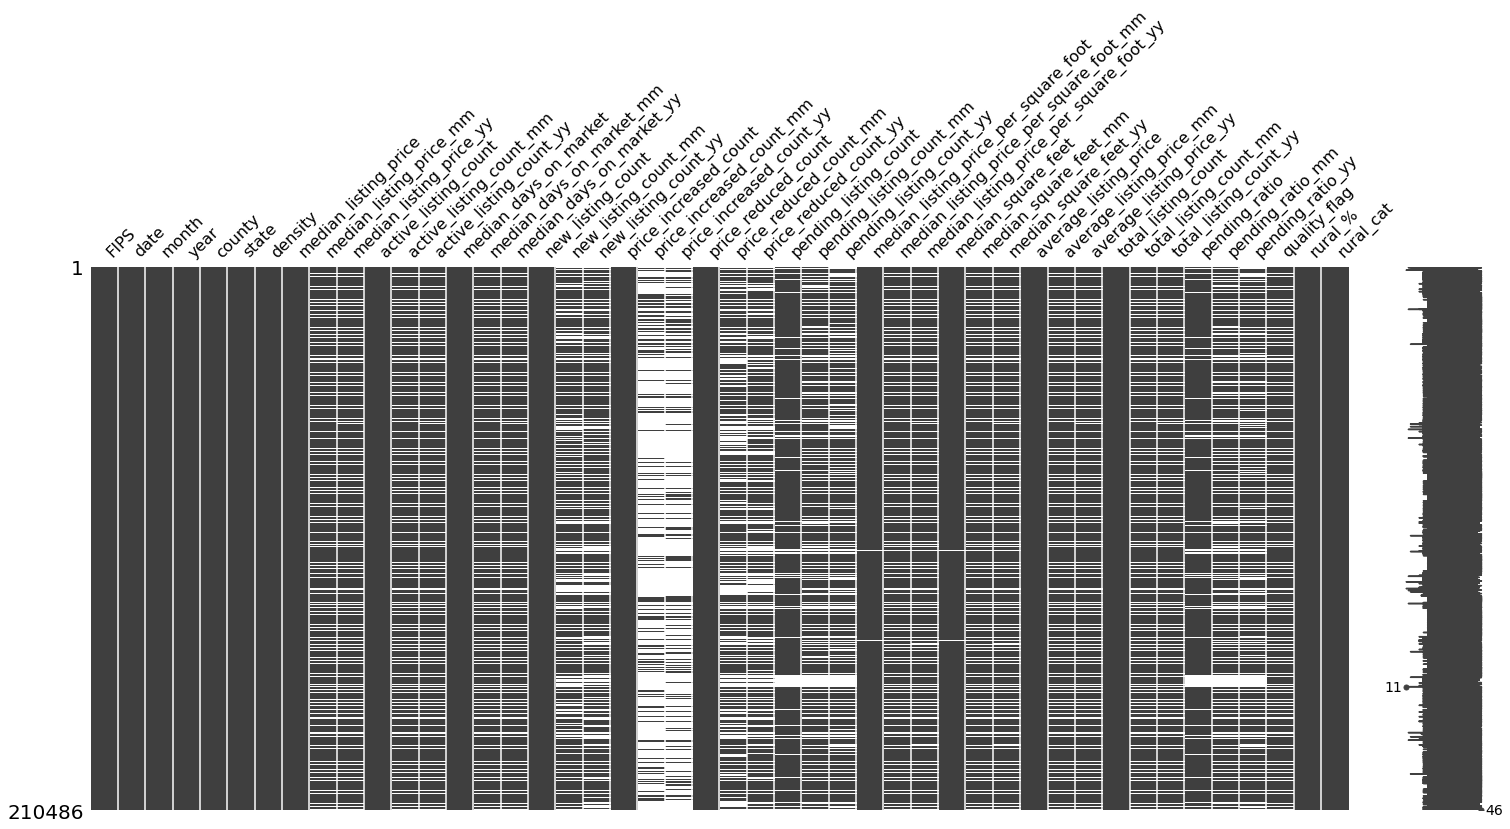

In [12]:
msno.matrix(df)

- The pending list price is not always available. If a pending definition is available for that geography. This is a snapshot measure of how many pending listings can be expected on any given day of the specified month.
- Since the pending list price is not always available and so will the ration of the pending list price. The ratio of the pending listing count to the active listing count within the specified geography during the specified month.<br>
- M/M will not be included because it is the percentage change in the price increase count from the previous month.<br>
- Y/Y will not be included too because it is the percentage change in the price increase count from the same month in the previous year.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210486 entries, 0 to 210485
Data columns (total 46 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   FIPS                                     210486 non-null  int64  
 1   date                                     210486 non-null  object 
 2   month                                    210486 non-null  int64  
 3   year                                     210486 non-null  int64  
 4   county                                   210486 non-null  object 
 5   state                                    210486 non-null  object 
 6   density                                  210486 non-null  int64  
 7   median_listing_price                     210456 non-null  float64
 8   median_listing_price_mm                  173231 non-null  float64
 9   median_listing_price_yy                  172416 non-null  float64
 10  active_listing_count            

In [14]:
#These are the null values that should be deleted
df_null = df[df['median_square_feet'].isnull()]
# drop the null value for average_listing_price
df.drop(index=df_null.index, 
           axis=0, 
           inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210005 entries, 0 to 210485
Data columns (total 46 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   FIPS                                     210005 non-null  int64  
 1   date                                     210005 non-null  object 
 2   month                                    210005 non-null  int64  
 3   year                                     210005 non-null  int64  
 4   county                                   210005 non-null  object 
 5   state                                    210005 non-null  object 
 6   density                                  210005 non-null  int64  
 7   median_listing_price                     210005 non-null  float64
 8   median_listing_price_mm                  172999 non-null  float64
 9   median_listing_price_yy                  172224 non-null  float64
 10  active_listing_count            

In [15]:
df1 = df[['FIPS', 'year', 'month', 'county', 'state', 'date', 'density', 'active_listing_count', 
          'average_listing_price', 'average_listing_price_mm', 'average_listing_price_yy',  
          'median_listing_price', 'median_listing_price_mm', 'median_listing_price_yy',
          'median_listing_price_per_square_foot', 'median_square_feet',  
          'total_listing_count', 'rural_%','rural_cat']]

In [16]:
df1.head()

,FIPS,year,month,county,state,date,density,active_listing_count,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_per_square_foot,median_square_feet,total_listing_count,rural_%,rural_cat
0,2013,2016,7,Aleutians East Borough,AK,2016-07-01,0,3.0,394833.0,NaN,NaN,485000.0,NaN,NaN,93.0,4100.0,3.0,100.0,1
1,2013,2016,8,Aleutians East Borough,AK,2016-08-01,0,4.0,308350.0,NaN,NaN,485000.0,NaN,NaN,93.0,4100.0,4.0,100.0,1
2,2013,2016,9,Aleutians East Borough,AK,2016-09-01,0,4.0,307350.0,NaN,NaN,485000.0,NaN,NaN,93.0,4100.0,4.0,100.0,1
3,2013,2016,10,Aleutians East Borough,AK,2016-10-01,0,4.0,281880.0,NaN,NaN,199500.0,NaN,NaN,93.0,2469.0,4.0,100.0,1
4,2013,2016,11,Aleutians East Borough,AK,2016-11-01,0,4.0,336125.0,NaN,NaN,485000.0,NaN,NaN,119.0,4100.0,4.0,100.0,1


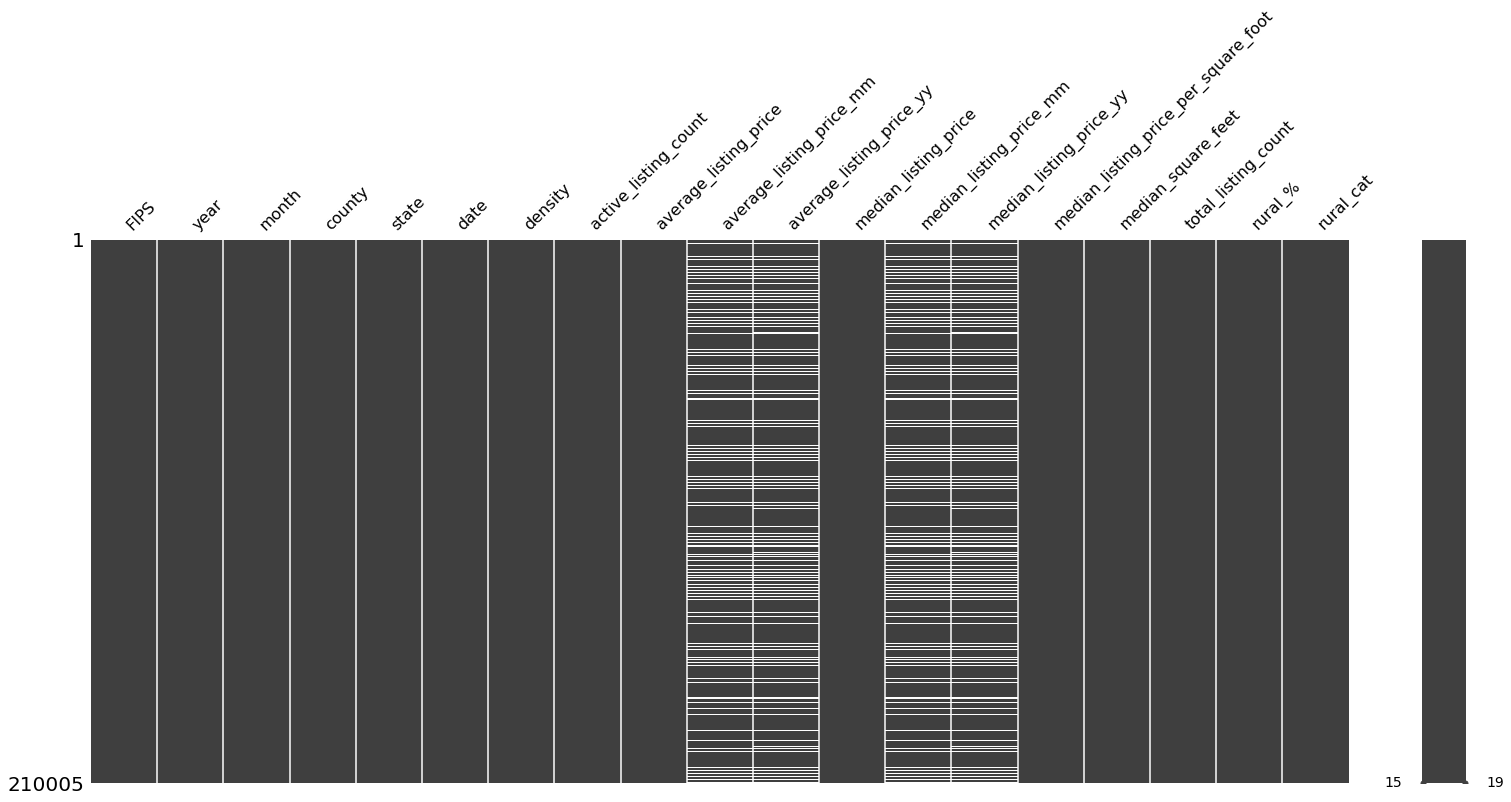

In [17]:
msno.matrix(df1)

The missing data are those that have ratio or change from one period to another. Otherwise, data has no null or nan values

# 2. Save Real Estate and Density to CSV
- RE_Density.csv

In [18]:
df1.to_csv('RE_Density.csv', index=False)